In [3]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colormaps
from io import StringIO  
import sys
sys.path.append('../')
from utils.results_utils import BaseSubsamplingType
import torch
import pandas as pd
api = wandb.Api()
from importlib import reload

import subsampling_classes
import plot_funcs
subsampling_classes = reload(subsampling_classes)
plot_funcs = reload(plot_funcs)
from subsampling_classes import *
from plot_funcs import *
import seaborn as sns
from legends_labels import *

In [4]:
is_saving_allowed = True
force_recompute = False

entity = 'haraghi'
folder_name = 'paper'
experiment_folder_name = 'fom'

assert not is_saving_allowed, "Are you sure? Please set is_saving_allowed to False."

AssertionError: Are you sure? Please set is_saving_allowed to False.

In [6]:
subfolder_name = os.path.join('../images/subsampling_methods',folder_name,experiment_folder_name)
if is_saving_allowed:
    if not os.path.exists(subfolder_name):
        os.makedirs(subfolder_name)
    # file_path = os.path.join(subfolder_name,"sparsity_vs_acc.tex")

In [7]:
datasets_name_and_num_classes = {
    "NCARS": {"name": "N-Cars", "num_classes": 2},
    "NASL": {"name": "N-ASL", "num_classes": 24},
    "NCALTECH101": {"name": "N-Caltech101", "num_classes": 101},
    "DVSGESTURE_TONIC": {"name": "DVS-Gesture", "num_classes": 11},}
for key,value in datasets_name_and_num_classes.items():
    print(f"{key}: {value['name']}")

NCARS: N-Cars
NASL: N-ASL
NCALTECH101: N-Caltech101
DVSGESTURE_TONIC: DVS-Gesture


In [8]:
kw = "DVS"
projects = api.projects(entity="haraghi")
for project in projects:
    if kw in project.name:
        print(project.name)

Spatial_DVSGESTURE_TONIC_ZERO_OFFSET
Spatiotemporal_DVSGESTURE_TONIC_remaining
Random_DVSGESTURE_TONIC_remaining
Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET
TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled
Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled
Temporal_random_offsets_DVS_GESTURE_TONIC
Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC
Spatial_dataset_wide_random_offsets_DVS_GESTURE_TONIC
Spatial_with_random_offsets_DVS_GESTURE_TONIC
Spatial_with_offset_DVS_GESTURE_TONIC
Subsamplimg_methods_DVS_GESTURE_TONIC
Subsamplimg_acc_comparision_DVS_GESTURE_TONIC
Subsamplimg-vs-bandwidth-DVS_GESTURE_TONIC
FINAL-DVSGESTURE_TONIC-HP-sweep-reduced
FINAL-DVSGESTURE_TONIC-HP-varyinig-sparsity
EST-DVSGESTURE-HP-sweep-InMemory
EST-DVSGESTURE-HP-sweep


In [9]:
datasets_name_and_project = {
"NASL":            ["Spatial_NASL_CORRECTED_OFFSET_42s",
                    "Temporal_NASL_dataset_wide_random_offsets_42s",
                    "Random_fixed_NASL_42s",
                    ],                  
"FAN1VS3":             "Subsamplimg-vs-bandwidth-FAN1VS3",
"NCALTECH101":      ["Random_fixed_NCALTECH101",
                     "Spatiotemporal_fixed_NCALTECH101",
                     "Temporal_dataset_wide_random_offsets_NCALTECH101",
                     "Spatial_dataset_wide_random_offsets_NCALTECH101",
                     "Baseline_EventCount_NCALTECH101_spatial_upsampled",
                     "TOS_2D_Harris_NCALTECH101",
                    ],
"DVSGESTURE_TONIC": [
                        "Subsamplimg_methods_DVS_GESTURE_TONIC",
                        "Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC", 
                        "Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET",
                        # "Spatial_with_random_offsets_DVS_GESTURE_TONIC",
                        # "Temporal_random_offsets_DVS_GESTURE_TONIC",
                        "Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled",
                        "TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled",
                    ],
"NCARS":          [
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_12s",
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_42s",
                        # "Temporal_dataset_wide_random_offsets_NCARS_42s",
                        # # "Spatiotemporal_fixed_NCARS_42s",
                        "Random_fixed_NCARS_100x120_42s",
                        "Temporal_dataset_wide_random_offset_NCARS_100x120_42s",
                        "Spatial_dataset_wide_random_offsets_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau10",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100",
                        "Spatiotemporal_fixed_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_5x5",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_11x11",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_9x9",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau30_7x7_mean_normalized",
                        "Baseline_EventCount_NCARS_100x120_42s_spatial_upsampled",
                        "TOS_2D_Harris_NCARS_100x120_24s",
                        "TOS_2D_Harris_NCARS_100x120_12s",
                        "TOS_2D_Harris_NCARS_100x120_42s",
                   ],
}

In [10]:
result_dict = {}
for dataset, project_name in datasets_name_and_project.items():
        
    if dataset != "NCALTECH101" and dataset != "NCARS" and dataset != "DVSGESTURE_TONIC": 
        continue
    
    print('*'*50)
    print(dataset+":", flush=True)
    print('*'*50)
    result_dict[dataset] = [ 
                    Spatial(dataset_name = dataset),
                    Temporal(dataset_name = dataset),
                    Random(dataset_name = dataset),
                    # SpatialRandom(dataset_name = dataset),
                    # SpatialZeroOffset(dataset_name = dataset),
                    # TemporalRandom(dataset_name = dataset),
                    # TemporalZeroOffset(dataset_name = dataset),
            
                    # Spatiotemporal10(dataset_name = dataset),
                    # Spatiotemporal30(dataset_name = dataset),
                    # Spatiotemporal100(dataset_name = dataset),
                    # Spatiotemporal100_5x5(dataset_name = dataset),
                    # Spatiotemporal100_9x9(dataset_name = dataset),
                    # Spatiotemporal100_11x11(dataset_name = dataset),
                    BaseLineEventCount(dataset_name = dataset),
                    TOS2DHarris(dataset_name = dataset),
                    Spatiotemporal30(dataset_name = dataset),
                    Spatiotemporal_normalized_mean(dataset_name = dataset),

                ]

    for result_class in result_dict[dataset]:
        result_class.label = legend_labels[result_class.get_name()] if result_class.get_name() in legend_labels else result_class.get_name()
        result_class.color = color_dict[result_class.get_name()] if result_class.get_name() in color_dict else result_class.get_color()
        result_class.marker = marker_dict[result_class.get_name()] if result_class.get_name() in marker_dict else result_class.get_marker()
        
    if force_recompute or not os.path.exists(f"{dataset}_results.pt"):
        if isinstance(project_name,list):
            runs = []
            for p in project_name:
                print(p, flush=True)
                runs.extend(api.runs(f"{entity}/{p}"))
        else:
            print(project_name, flush=True)
            runs = api.runs(f"{entity}/{project_name}")
        runs = [r for r in runs if r.state == "finished"]
        if len(runs) == 0:
            print(f"No runs found for {project_name}", flush=True)
            continue
        
        for r in runs:
            for result_class in result_dict[dataset]:
                result_class.process_run(r)
        result_to_save = []
        for result_class in result_dict[dataset]:
            result_class.create_data_frames()
            result_to_save.append(result_class.to_dict())
        torch.save(result_to_save, f"{dataset}_results.pt")
        
    else:
        result_to_save = torch.load(f"{dataset}_results.pt")
        for result_class in result_dict[dataset]:
            found_flag = False
            for result in result_to_save:
                if result_class.get_name() == result["name"]:
                    result_class.df = pd.read_json(StringIO(result["df"]))
                    result_class.df_zipped = pd.read_json(StringIO(result["df_zipped"]))
                    result_class._agg_bandwidth_acc()
                    result_class._agg_zipped_parameters()
                    result_class._check_empty_num_events()
                    result_class._clean_data_frame() 
                    result_class. _assert_non_empty_num_events_in_zipped()
                    print(f"Loaded {result_class.get_name()} from {dataset}_results.pt")
                    found_flag = True
                    break
            assert found_flag, f"Result not found for {result_class.get_name()} in {dataset}_results.pt"    


**************************************************
NCALTECH101:


**************************************************
Loaded spatial_dataset_wide_random_offsets from NCALTECH101_results.pt
Loaded temporal_dataset_wide_random_offset from NCALTECH101_results.pt
Loaded random_fixed from NCALTECH101_results.pt
Loaded baseline_event_count from NCALTECH101_results.pt
Loaded tos2dharris_fixed from NCALTECH101_results.pt
Loaded spatiotemporal_fixed_30_7x7 from NCALTECH101_results.pt
Loaded spatiotemporal_fixed_normalized_mean from NCALTECH101_results.pt
**************************************************
DVSGESTURE_TONIC:


/tmp/ipykernel_45401/3220043111.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result_to_save = torch.load(f"{dataset}_results.pt")
/home/hesam/Projects/DGCNN_CV_forma

**************************************************
Loaded spatial_dataset_wide_random_offsets from DVSGESTURE_TONIC_results.pt
Loaded temporal_dataset_wide_random_offset from DVSGESTURE_TONIC_results.pt
Loaded random_fixed from DVSGESTURE_TONIC_results.pt
Loaded baseline_event_count from DVSGESTURE_TONIC_results.pt
Loaded tos2dharris_fixed from DVSGESTURE_TONIC_results.pt
Loaded spatiotemporal_fixed_30_7x7 from DVSGESTURE_TONIC_results.pt
Loaded spatiotemporal_fixed_normalized_mean from DVSGESTURE_TONIC_results.pt
**************************************************
NCARS:
**************************************************
Loaded spatial_dataset_wide_random_offsets from NCARS_results.pt
Loaded temporal_dataset_wide_random_offset from NCARS_results.pt


/tmp/ipykernel_45401/3220043111.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result_to_save = torch.load(f"{dataset}_results.pt")
/home/hesam/Projects/DGCNN_CV_forma

Loaded random_fixed from NCARS_results.pt
Loaded baseline_event_count from NCARS_results.pt
Loaded tos2dharris_fixed from NCARS_results.pt
Loaded spatiotemporal_fixed_30_7x7 from NCARS_results.pt
Loaded spatiotemporal_fixed_normalized_mean from NCARS_results.pt


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x73d90f57e340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x73d90f57ed40> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x73d90f57e340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep curr

In [11]:
for sm in result_dict["NCARS"]:
    print(sm.get_name(), sm.df.shape)


spatial_dataset_wide_random_offsets (72, 10)
temporal_dataset_wide_random_offset (36, 9)
random_fixed (36, 8)
baseline_event_count (24, 9)
tos2dharris_fixed (108, 13)
spatiotemporal_fixed_30_7x7 (36, 11)
spatiotemporal_fixed_normalized_mean (36, 11)


In [12]:
ds_name = "DVSGESTURE_TONIC"
from sklearn.metrics import auc

# Example False Positive Rate (FPR) and True Positive Rate (TPR) values

xs = (result_dict[ds_name][3].df["num_events"])
ys = result_dict[ds_name][3].df["test_acc"]
# sort xs and ys by the increasing xs
xs, ys = zip(*sorted(zip(xs, ys)))

# Compute AUC using trapezoidal integration
roc_auc = auc(xs, ys)

print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 19068.2282


In [15]:
auc_dict = {}
for dataset, subsampling_results in  result_dict.items():
    auc_dict[dataset] = {}
    for result in subsampling_results:
        zipped_parameters_label = result._zipped_parameters_label
        auc_dict[dataset][result.get_name()] = []
        for seed in result.df['seed'].unique():
            seed_df = result.df[result.df['seed'] == seed].sort_values(by='num_events')
            # seed_df = seed_df[seed_df['num_events'] > 100]
            xs = np.log(seed_df['num_events'])
            ys = seed_df['test_acc']
            auc_dict[dataset][result.get_name()].append(auc(xs, ys).item()/auc(xs, ys * 0 + 1).item())
            # plt.plot(np.log10(xs),ys)

In [16]:
auc_mean_std = {}
for dataset, auc_results in auc_dict.items():
    if dataset != "DVSGESTURE_TONIC" and dataset != "NCALTECH101" and dataset != "NCARS":
        continue
    print(dataset)
    auc_mean_std[dataset] = {}
    for result_name, aucs in auc_results.items():
        if np.isnan(np.mean(aucs)):
            continue
        auc_mean_std[dataset][result_name] = (np.mean(aucs), np.std(aucs))
        print(f"{result_name}: {np.mean(aucs)*100:.3f}+-{np.std(aucs)*100:.3f}")
    print()

NCALTECH101
spatial_dataset_wide_random_offsets: 69.724+-0.501
temporal_dataset_wide_random_offset: 69.728+-0.386
random_fixed: 70.753+-0.328
baseline_event_count: 64.773+-0.550
tos2dharris_fixed: 70.665+-0.286
spatiotemporal_fixed_30_7x7: 72.254+-0.398

DVSGESTURE_TONIC
spatial_dataset_wide_random_offsets: 82.731+-1.565
temporal_dataset_wide_random_offset: 84.122+-0.745
random_fixed: 88.704+-1.716
baseline_event_count: 74.830+-0.689
tos2dharris_fixed: 88.621+-0.777
spatiotemporal_fixed_30_7x7: 89.925+-1.339

NCARS
spatial_dataset_wide_random_offsets: 77.004+-1.244
temporal_dataset_wide_random_offset: 79.597+-0.215
random_fixed: 78.477+-1.395
baseline_event_count: 82.167+-0.531
tos2dharris_fixed: 80.804+-2.006
spatiotemporal_fixed_30_7x7: 73.404+-1.484
spatiotemporal_fixed_normalized_mean: 78.858+-0.838



/home/hesam/Projects/DGCNN_CV_format/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hesam/Projects/DGCNN_CV_format/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [20]:
def generate_latex_table_auc(auc_mean_std, filepath):
    datasets = list(auc_mean_std.keys())
    subsampling_methods = list(next(iter(auc_mean_std.values())).keys())

    # Identify max values for each dataset
    max_values = {dataset: max(
        (auc_mean_std[dataset][method][0] for method in subsampling_methods if not np.isnan(auc_mean_std[dataset][method][0])),
        default=float('-inf')
    ) for dataset in datasets}

    with open(filepath, "w") as f:
        f.write("    \\begin{tabular}{l" + "c" * len(datasets) + "}\n")
        f.write("        \\toprule\n")
        f.write("        Method & " + " & ".join([datasets_name_and_num_classes[d]['name'] for d in datasets]) + " \\\\\n")
        f.write("        \\midrule\n")

        for method in subsampling_methods:
            row = [legend_labels_main_short[method].replace("_", "\\_")]
            for dataset in datasets:
                mean, std = auc_mean_std[dataset][method]
                if np.isnan(mean):
                    continue
                else:
                    value_str = f"{mean:.3f} {{\\scriptsize $\\pm$ {std:.3f}}}"
                    if mean == max_values[dataset]:  # Bold max value
                        value_str = f"\\textbf{{{value_str}}}"
                    row.append(value_str)
            f.write("        " + " & ".join(row) + " \\\\\n")

        f.write("        \\bottomrule\n")
        f.write("    \\end{tabular}\n")




In [21]:
if is_saving_allowed:
    generate_latex_table_auc(auc_mean_std,os.path.join(subfolder_name,f'normalized_auc_log.tex'))

NCALTECH101
DVSGESTURE_TONIC


/tmp/ipykernel_37957/1243277614.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aucs, label=legend_labels_main_short[result_name], kde=True)
/tmp/ipykernel_37957/1243277614.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aucs, label=legend_labels_main_short[result_name], kde=True)
/tmp/i

NCARS


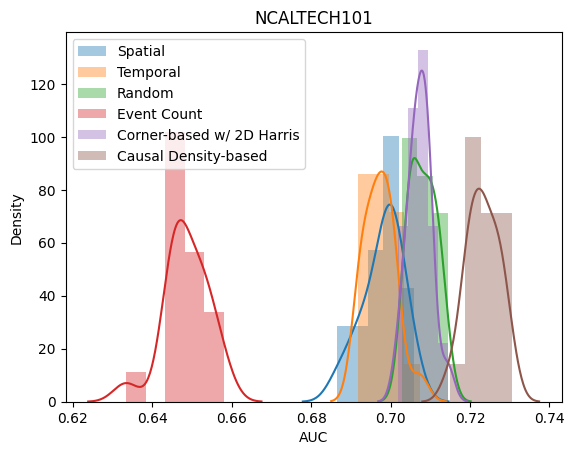

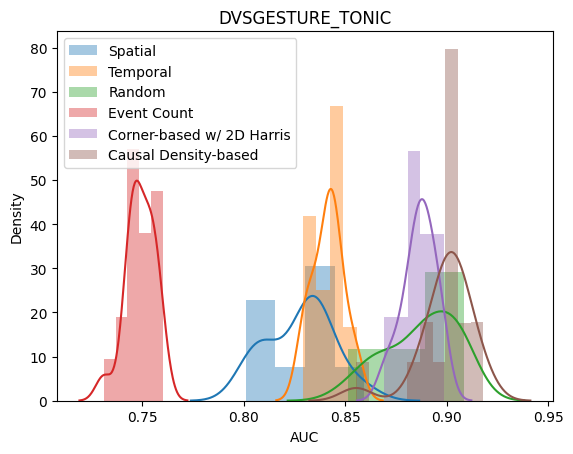

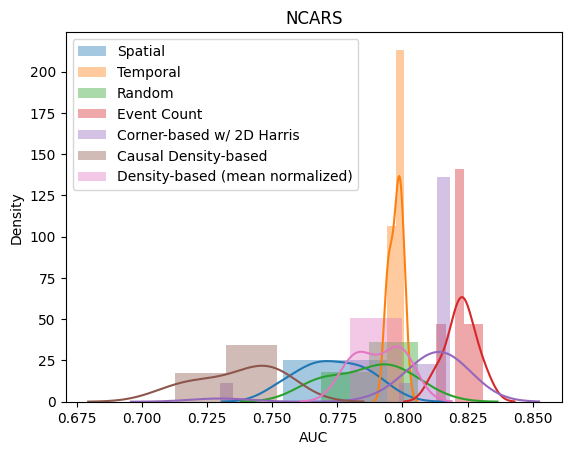

In [14]:
import seaborn as sns
for dataset, subsampling_results in auc_dict.items():
    print(dataset)
    ax, fig = plt.subplots()
    for result_name, aucs in subsampling_results.items():
        # print(f"{result_name}: {np.mean(aucs):.4f}+-{np.std(aucs):.4f}")
        if np.isnan(np.mean(aucs)):
            continue
        sns.distplot(aucs, label=legend_labels_main_short[result_name], kde=True)
    
    plt.title(f"{dataset}")
    plt.xlabel("AUC")
    plt.ylabel("Density")
    
    plt.legend()

In [14]:
for dataset, subsampling_results in  result_dict.items():
    if dataset != "DVSGESTURE_TONIC":
        continue
    for result in subsampling_results:
        if result.get_name() == "Spatiotemporal30":
            continue
        zipped_parameters_label = result._zipped_parameters_label
        for seed in result.df['seed'].unique():
            xs, ys = auc_dict[dataset][result.get_name()][seed]
            plt.plot(np.log10(xs),ys, label=result.get_name())
        plt.legend()
        plt.show()

TypeError: cannot unpack non-iterable float object

In [ ]:
figure_of_merit_dict = {}

for dataset, subsampling_results in  result_dict.items():
    figure_of_merit_dict[dataset] = {}
    for result in subsampling_results:
        zipped_parameters_label = result._zipped_parameters_label
        figure_of_merit_dict[dataset][result.get_name()] = {}
        for subsmpling_lable in result.df_zipped[zipped_parameters_label]:
                subsmpling_group_df = result.df[result.df[zipped_parameters_label] == subsmpling_lable]
                bandwidth_mean = subsmpling_group_df['bandwidth'].mean()
                figure_of_merit_dict[dataset][result.get_name()][bandwidth_mean] = (subsmpling_group_df['test_acc'] / subsmpling_group_df['bandwidth']).to_numpy() * 100_000 


In [ ]:
import scipy

p_value_respective_random_dict = {}

for dataset, subsampling_results in  result_dict.items():
    p_value_respective_random_dict[dataset] = {}
    for result in subsampling_results:
        zipped_parameters_label = result._zipped_parameters_label
        dummy_dict = {}
        for subsmpling_lable in result.df_zipped[zipped_parameters_label]:
            subsmpling_group_df = result.df[result.df[zipped_parameters_label] == subsmpling_lable]
            bandwidth_mean = subsmpling_group_df['bandwidth'].mean()
            dummy_dict[bandwidth_mean] = subsmpling_group_df
        if dummy_dict:
            p_value_respective_random_dict[dataset][result.get_name()] = [value for key, value in sorted(dummy_dict.items())]

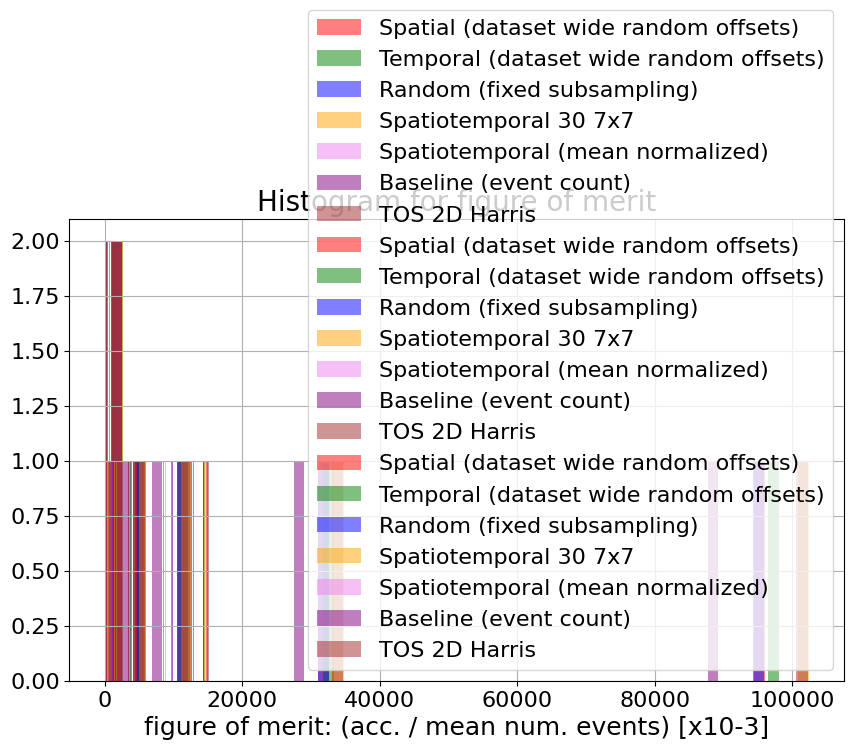

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [ ]:

plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
for dataset, values in  figure_of_merit_dict.items():
    for subsampling_type, values_ in values.items():
        plt.hist(values_, bins=60, alpha=0.5, label=legend_labels[subsampling_type], color=color_dict[subsampling_type])
        
        
        
plt.xlabel('figure of merit: (acc. / mean num. events) [x10-3]', fontsize=18)  # Increase label font size
plt.title('Histogram for figure of merit', fontsize=20)  # Increase title font size

plt.xticks(fontsize=16)  # Increase tick font size
plt.yticks(fontsize=16)  # Increase tick font size

plt.legend(fontsize=16)  # Increase legend font size
plt.grid(True)
plt.savefig(os.path.join(f"{subfolder_name}", f"{dataset}_fom_hist.png"), bbox_inches='tight')
plt.show()
figure_of_merit_bar_dict = {}
for dataset, values in  figure_of_merit_dict.items():
    if dataset != "DVSGESTURE_TONIC":
        continue
    figure_of_merit_bar_dict[dataset] = {"subsampling_category": [], "figure_of_merit_mean": [], "figure_of_merit_std": []}
    for subsampling_type, values_ in values.items():
        figure_of_merit_bar_dict[dataset]["subsampling_category"].append(legend_labels[subsampling_type])
        figure_of_merit_bar_dict[dataset]["figure_of_merit_mean"].append(np.mean(values_))
        figure_of_merit_bar_dict[dataset]["figure_of_merit_std"].append(np.std(values_))

for dataset, fom_values in  figure_of_merit_bar_dict.items():
    if dataset != "DVSGESTURE_TONIC":
        continue
    categories = fom_values["subsampling_category"]
    values = fom_values["figure_of_merit_mean"]
    errors = fom_values["figure_of_merit_std"]

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(categories, values, xerr=errors, capsize=5)

    # Add labels and title
    plt.xlabel('Figure of Merit', fontsize=18)
    plt.title('Figure of Merit bar plot (mean and std)', fontsize=20)


    plt.xticks(fontsize=16)  # Increase tick font size
    plt.yticks(fontsize=16)  # Increase tick font size

    plt.savefig(os.path.join(f"{subfolder_name}", f"{dataset}_fom_bar_plot.png"), bbox_inches='tight')
    plt.show()
        



In [ ]:
def generate_latex_tables_pvalue(p_value_respective_random_dict, save_path):
    
    for dataset, subsampling_dict in p_value_respective_random_dict.items():
        
        if dataset != "DVSGESTURE_TONIC" and dataset != "NCALTECH101":
            continue
        
        with open(os.path.join(save_path,f'{dataset}_p_value_random.tex'), "w") as f:
            
            # Extract all bandwidth keys from subsampling types
            num_levels = max([len(values) for values in subsampling_dict.values()])
            
            column_format = "l" + "c" * num_levels
            f.write(f"\\begin{{tabular}}{{{column_format}}}\n")
            f.write("\\hline\n")

            # Header row
            f.write("Subsampling Type & " + " & ".join(f"Level {i+1}" for i in range(num_levels)) + " \\\\\n")
            f.write("\\hline\n")

            df_random = p_value_respective_random_dict[dataset]["random_fixed"]   
            # Table rows (one per subsampling type)
            for subsampling_type, df_list in subsampling_dict.items():
                
                if len(df_list) ==  num_levels:                       
                    row_values = []
                    for i, df_result in enumerate(df_list):
    
                        p_values = scipy.stats.ttest_ind(df_result["test_acc"], df_random[i]["test_acc"], equal_var=False).pvalue
                        row_values.append(f"{p_values:.4f}")

                    f.write(f"{legend_labels_main_short[subsampling_type]} & " + " & ".join(row_values) + " \\\\\n")

            f.write("\\hline\n\\end{tabular}\n\n")

    print(f"LaTeX tables saved to {save_path}")


In [ ]:
if is_saving_allowed:
    generate_latex_tables_pvalue(p_value_respective_random_dict, save_path = subfolder_name)

LaTeX tables saved to ../images/subsampling_methods/paper/fom


In [ ]:
def generate_latex_tables(figure_of_merit_dict, save_path):
    
    for dataset, subsampling_dict in figure_of_merit_dict.items():
        
        if dataset != "DVSGESTURE_TONIC" and dataset != "NCALTECH101":
            continue
        
        with open(os.path.join(save_path,f'{dataset}.tex'), "w") as f:
            
            # Extract all bandwidth keys from subsampling types
            bandwidth_sets = [set(values.keys()) for values in subsampling_dict.values()]
            num_levels = max(len(bw_set) for bw_set in bandwidth_sets)
            
            column_format = "l" + "c" * num_levels
            f.write(f"\\begin{{tabular}}{{{column_format}}}\n")
            f.write("\\hline\n")

            # Header row
            f.write("Subsampling Type & " + " & ".join(f"Level {i+1}" for i in range(num_levels)) + " \\\\\n")
            f.write("\\hline\n")

            # Table rows (one per subsampling type)
            for subsampling_type, bandwidth_dict in subsampling_dict.items():
                
                if len(bandwidth_dict) ==  num_levels:                       
                    row_values = []
                    sorted_bandwidths = sorted(bandwidth_dict.keys())
                    for bw in sorted_bandwidths:
                        merits = bandwidth_dict[bw]
                        mean_val = np.mean(merits)
                        std_val = np.std(merits)
                        row_values.append(f"{mean_val:.2f} $\\pm$ {std_val:.2f}")

                    f.write(f"{legend_labels_main_short[subsampling_type]} & " + " & ".join(row_values) + " \\\\\n")

            f.write("\\hline\n\\end{tabular}\n\n")

    print(f"LaTeX tables saved to {save_path}")



In [ ]:
if is_saving_allowed:
    generate_latex_tables(figure_of_merit_dict, save_path = subfolder_name)

LaTeX tables saved to ../images/subsampling_methods/paper/fom


In [ ]:
ds_name = "NCALTECH101"
for i, result in enumerate(result_dict[ds_name]):
    print("{}: {}".format(i, result.get_name()))

0: spatial_dataset_wide_random_offsets
1: temporal_dataset_wide_random_offset
2: random_fixed
3: spatiotemporal_fixed_30_7x7
4: spatiotemporal_fixed_normalized_mean
5: baseline_event_count
6: tos2dharris_fixed


In [ ]:
result_dict['NCALTECH101'][0].df_zipped.test_acc.nanmean / result_dict['NCALTECH101'][0].df_zipped.bandwidth.nanmean * 100000

0     0.905989
1     2.608986
2     7.013917
3    13.243128
4    24.044150
5    43.289748
Name: nanmean, dtype: float64

In [ ]:
result_dict['NCALTECH101'][0].df_zipped

h_r_v_r_zipped   val_acc            test_acc               bandwidth  \
                   nanmean    nanstd   nanmean    nanstd       nanmean   
0         (2, 2)  0.886134  0.006746  0.870644  0.009394  96098.720052   
1         (3, 4)  0.854223  0.008569  0.835178  0.009626  32011.608290   
2         (6, 6)  0.779977  0.011972  0.751784  0.012969  10718.455458   
3        (8, 10)  0.673975  0.010740  0.641177  0.012101   4841.580756   
4       (12, 15)  0.546359  0.010808  0.518368  0.010397   2155.901421   
5       (16, 25)  0.440823  0.007608  0.425297  0.008801    982.443373   

                 num_events              
       nanstd       nanmean      nanstd  
0  695.037635  28864.274097  208.338451  
1  302.446909   9602.267731   91.707255  
2  151.967301   3203.855073   45.925473  
3  128.148463   1439.272623   38.828506  
4   70.664101    635.162121   21.307407  
5   29.047775    285.383584    8.744801

In [ ]:
0.641177	/	np.log10(4841.580756) * 100

np.float64(17.399707750827258)

In [ ]:
result_dict['NCALTECH101'][5].df_zipped

h_r_v_r_threshold_zipped   val_acc            test_acc            \
                             nanmean    nanstd   nanmean    nanstd   
0             (2, 2, 0.75)  0.881645  0.007794  0.872010  0.007274   
1             (3, 4, 0.75)  0.840318  0.006649  0.826678  0.008687   
2              (6, 6, 1.0)  0.664403  0.011057  0.641574  0.012263   
3             (8, 10, 1.0)  0.533696  0.007223  0.507968  0.009462   
4            (12, 15, 1.0)  0.409197  0.010596  0.394752  0.006801   
5            (16, 25, 1.0)  0.353253  0.008768  0.337392  0.006770   

      bandwidth              num_events         
        nanmean    nanstd       nanmean nanstd  
0  89224.056424  0.004284  26711.760592    0.0  
1  28036.661350  0.000858   8375.516707    0.0  
2   7249.777642  0.000197   2164.071076    0.0  
3   3600.404887  0.000113   1072.806752    0.0  
4   1861.880127  0.000000    552.141463    0.0  
5   1032.591220  0.000056    302.906074    0.0

In [ ]:
0.507968	/ np.log10(3600.404887)	 * 100

np.float64(14.283403158933982)

In [ ]:
result_dict['NCALTECH101'][5].df_zipped.test_acc.nanmean / result_dict['NCALTECH101'][5].df_zipped.bandwidth.nanmean * 100000

0     0.977327
1     2.948559
2     8.849574
3    14.108629
4    21.201792
5    32.674341
Name: nanmean, dtype: float64